<a href="https://colab.research.google.com/github/aditijha53/spotify_analysis/blob/main/spotify_trend_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [4]:
import pandas as pd

try:
    df = pd.read_csv('spotifydataset.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'spotifydataset.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse 'spotifydataset.csv'. Check file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Unnamed: 0,artist_name,genres,followers,artist_popularity,artist_url,track_name,album_name,release_date,duration_ms,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,Ariana Grande,pop,98934105,89,https://open.spotify.com/artist/66CXWjxzNUsdJx...,we can't be friends (wait for your love),eternal sunshine,2024-03-08,228639,...,0.646,5,-8.334,1,0.0427,0.0615,0.000030,0.0740,0.295,115.842
1,1,Ariana Grande,pop,98934105,85,https://open.spotify.com/artist/66CXWjxzNUsdJx...,the boy is mine,eternal sunshine,2024-03-08,173639,...,0.630,7,-5.854,0,0.0434,0.1570,0.000000,0.0732,0.447,97.998
2,2,Ariana Grande,pop,98934105,83,https://open.spotify.com/artist/66CXWjxzNUsdJx...,intro (end of the world),eternal sunshine,2024-03-08,92400,...,0.362,10,-9.480,1,0.0416,0.6700,0.000000,0.1760,0.385,84.726
3,3,Ariana Grande,pop,98934105,80,https://open.spotify.com/artist/66CXWjxzNUsdJx...,Save Your Tears (Remix) (with Ariana Grande) -...,After Hours (Deluxe),2020-03-20,191013,...,0.825,0,-4.645,1,0.0325,0.0215,0.000024,0.0936,0.593,118.091
4,4,Ariana Grande,pop,98934105,79,https://open.spotify.com/artist/66CXWjxzNUsdJx...,"yes, and?",eternal sunshine,2024-03-08,214994,...,0.775,1,-6.614,1,0.0548,0.1900,0.000065,0.1130,0.787,118.998


(1000, 23)


Data Types:
 Unnamed: 0             int64
artist_name           object
genres                object
followers              int64
artist_popularity      int64
artist_url            object
track_name            object
album_name            object
release_date          object
duration_ms            int64
explicit                bool
track_popularity       int64
danceability         float64
energy               float64
key                    int64
loudness             float64
mode                   int64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
dtype: object

Missing Values:
 Unnamed: 0             0
artist_name            0
genres               163
followers              0
artist_popularity      0
artist_url             0
track_name             0
album_name             0
release_date           0
duration_ms            0
explicit               0
track_popular

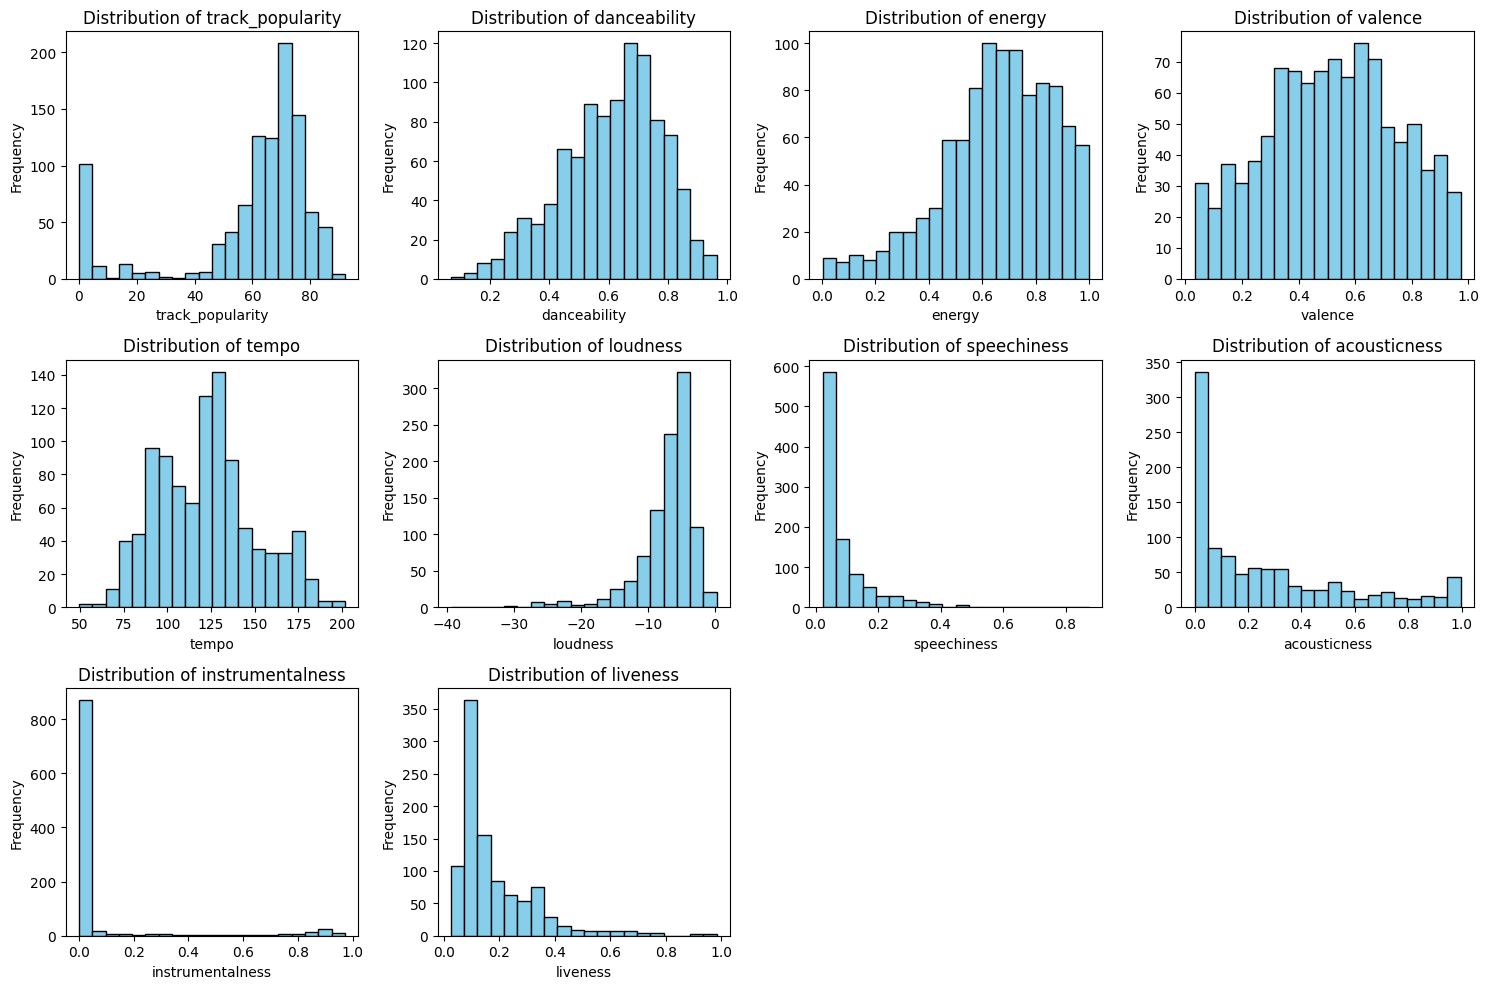


Correlation Matrix:
                   track_popularity  danceability    energy   valence  \
track_popularity          1.000000      0.132689  0.083622  0.130785   
danceability              0.132689      1.000000  0.114421  0.446579   
energy                    0.083622      0.114421  1.000000  0.240477   
valence                   0.130785      0.446579  0.240477  1.000000   
tempo                    -0.073141     -0.124872  0.172751  0.002468   
loudness                  0.192461      0.259725  0.768502  0.189802   
speechiness              -0.130975      0.178974  0.085976  0.096740   
acousticness             -0.083852     -0.180574 -0.675360 -0.081459   
instrumentalness         -0.314403     -0.291401 -0.303094 -0.252485   
liveness                 -0.000940     -0.088437  0.247600  0.053952   

                     tempo  loudness  speechiness  acousticness  \
track_popularity -0.073141  0.192461    -0.130975     -0.083852   
danceability     -0.124872  0.259725     0.178974  

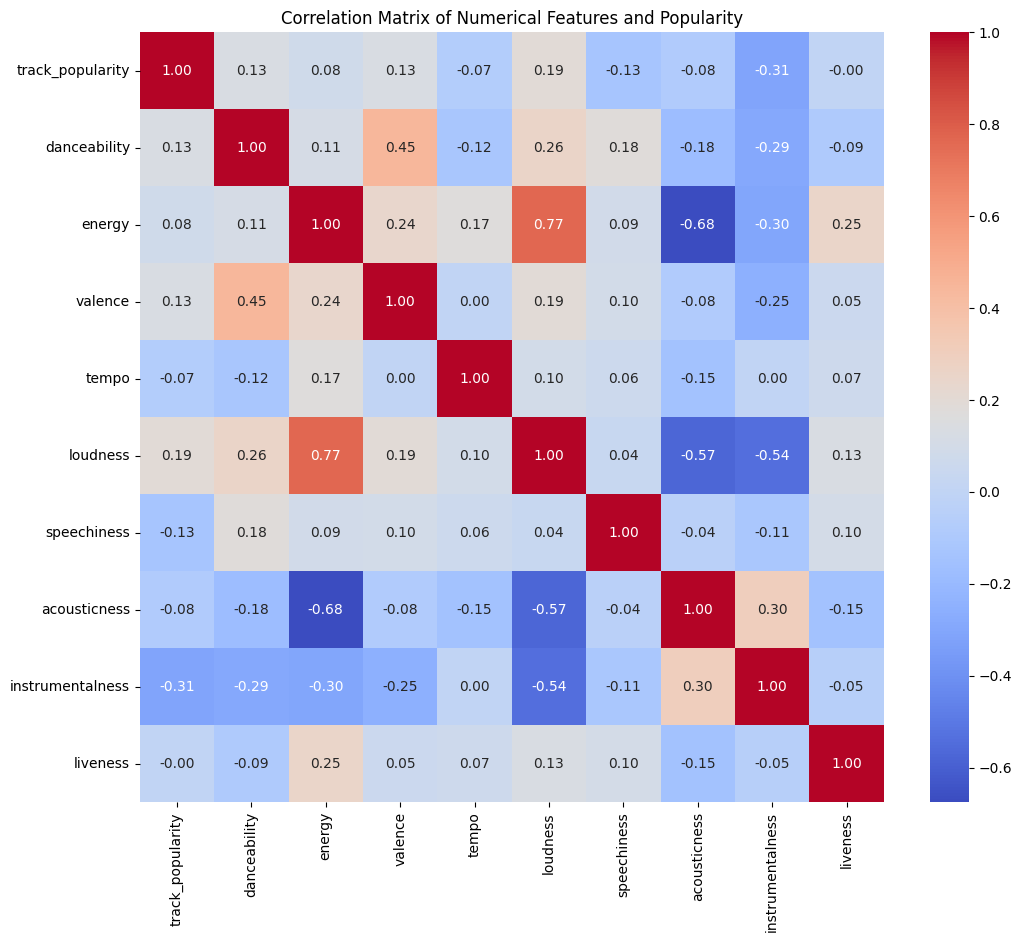

In [6]:
# Data Types
print("Data Types:\n", df.dtypes)

# Missing Values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

# Descriptive Statistics
numerical_features = ['track_popularity', 'danceability', 'energy', 'valence', 'tempo', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness']
print("\nDescriptive Statistics:\n", df[numerical_features].describe())


# Unique Values in Categorical Features
categorical_features = ['genres', 'artist_name', 'track_name']
for col in categorical_features:
    print(f"\nUnique values in '{col}': {df[col].nunique()}")
    #print(df[col].value_counts().head())  # Display top few unique values

# Distribution of Numerical Features
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_features):
    plt.subplot(3, 4, i+1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Correlation between Numerical Features and Popularity
if 'track_popularity' in df.columns:
    correlation_matrix = df[numerical_features].corr()
    print("\nCorrelation Matrix:\n", correlation_matrix)
    plt.figure(figsize=(12, 10))
    import seaborn as sns
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Numerical Features and Popularity')
    plt.show()
else:
    print("Popularity column not found in the dataframe")

In [10]:

#filling missing 'genres' with 'unknown'
df['genres'].fillna('unknown', inplace=True)
#check for and remove duplicates
df.drop_duplicates(inplace=True)
#handle outliers in numberical features using IQR
numerical_features = ['track_popularity','danceability','energy','valence','tempo','loudness','speechiness','acousticness','instrumentalness','liveness']
for col in numerical_features:
  Q1 =df[col].quantile(0.25)
  Q3 =df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

  #REVIEW 'GENRES' COLUM AFTER HANDLING OUTLIERS
print(df['genres'].value_counts().head(10))
display(df.head())

genres
pop                                                                                                    24
dance pop, pop                                                                                         10
atl hip hop, contemporary r&b, dance pop, pop, r&b, rap, south carolina hip hop, urban contemporary     9
bachata, latin hip hop, latin pop, urbano latino                                                        9
modern rock, neon pop punk, pop emo, pop punk                                                           9
electropop, etherpop, indie poptimism, pop                                                              8
pov: indie                                                                                              8
neo mellow, post-teen pop, viral pop                                                                    8
british soul, pop, pop soul, uk pop                                                                     8
contemporary country, modern country po

<ipython-input-10-754b8fcc08ab>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['genres'].fillna('unknown', inplace=True)


,Unnamed: 0,artist_name,genres,followers,artist_popularity,artist_url,track_name,album_name,release_date,duration_ms,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1,1,Ariana Grande,pop,98934105,85,https://open.spotify.com/artist/66CXWjxzNUsdJx...,the boy is mine,eternal sunshine,2024-03-08,173639,...,0.630,7,-5.854,0,0.0434,0.1570,0.000000,0.0732,0.447,97.998
2,2,Ariana Grande,pop,98934105,83,https://open.spotify.com/artist/66CXWjxzNUsdJx...,intro (end of the world),eternal sunshine,2024-03-08,92400,...,0.362,10,-9.480,1,0.0416,0.6700,0.000000,0.1760,0.385,84.726
5,5,Ariana Grande,pop,98934105,82,https://open.spotify.com/artist/66CXWjxzNUsdJx...,One Last Time,My Everything - Deluxe,2014-08-22,197266,...,0.593,8,-5.036,1,0.0323,0.0930,0.000002,0.0960,0.104,125.025
6,6,Ariana Grande,pop,98934105,78,https://open.spotify.com/artist/66CXWjxzNUsdJx...,Die For You (with Ariana Grande) - Remix,Starboy (Deluxe),2023-03-14,232857,...,0.485,1,-7.635,0,0.0582,0.2760,0.000000,0.3230,0.517,66.961
8,8,Ariana Grande,pop,98934105,70,https://open.spotify.com/artist/66CXWjxzNUsdJx...,Dangerous Woman,Dangerous Woman,2016-05-20,235946,...,0.602,4,-5.369,0,0.0412,0.0529,0.000000,0.3560,0.289,134.049


track_popularity         \
                                                               mean median   
genres                                                                       
afrobeats                                                 67.000000   67.0   
afrobeats, nigerian pop                                   69.000000   69.0   
album rock, classic rock, folk rock, mellow gol...        56.000000   56.0   
album rock, classic rock, hard rock, rock                 74.500000   74.5   
alt z                                                     79.285714   80.0   
...                                                             ...    ...   
puerto rican pop, reggaeton, trap latino, urban...        80.000000   80.0   
reggaeton, reggaeton flow, trap boricua, trap l...        77.500000   77.0   
social media pop                                          50.500000   50.5   
trap boricua, urbano latino                               67.333333   67.0   
unknown                                                   69.600000   72.0   

                                                             danceability  \
                                                         std         mean   
genres                                                                      
afrobeats                                                NaN     0.695000   
afrobeats, nigerian pop                             1.000000     0.723000   
album rock, classic rock, folk rock, mellow gol...       NaN     0.529000   
album rock, classic rock, hard rock, rock           2.121320     0.369000   
alt z                                               4.889250     0.565000   
...                                                      ...          ...   
puerto rican pop, reggaeton, trap latino, urban...       NaN     0.750000   
reggaeton, reggaeton flow, trap boricua, trap l...  2.645751     0.761500   
social media pop                                    0.707107     0.686500   
trap boricua, urbano latino                         2.516611     0.693667   
unknown                                             3.781534     0.543800   

                                                                      \
                                                    median       std   
genres                                                                 
afrobeats                                           0.6950       NaN   
afrobeats, nigerian pop                             0.7550  0.147625   
album rock, classic rock, folk rock, mellow gol...  0.5290       NaN   
album rock, classic rock, hard rock, rock           0.3690  0.029698   
alt z                                               0.5540  0.084321   
...                                                    ...       ...   
puerto rican pop, reggaeton, trap latino, urban...  0.7500       NaN   
reggaeton, reggaeton flow, trap boricua, trap l...  0.7700  0.052564   
social media pop                                    0.6865  0.044548   
trap boricua, urbano latino                         0.7200  0.081746   
unknown                                             0.4940  0.085321   

                                                      energy          \
                                                        mean  median   
genres                                                                 
afrobeats                                           0.664000  0.6640   
afrobeats, nigerian pop                             0.725667  0.6750   
album rock, classic rock, folk rock, mellow gol...  0.472000  0.4720   
album rock, classic rock, hard rock, rock           0.748500  0.7485   
alt z                                               0.521000  0.4960   
...                                                      ...     ...   
puerto rican pop, reggaeton, trap latino, urban...  0.522000  0.5220   
reggaeton, reggaeton flow, trap boricua, trap l...  0.734250  0.7200   
social media pop                                    0.806500  0.8065   
trap b

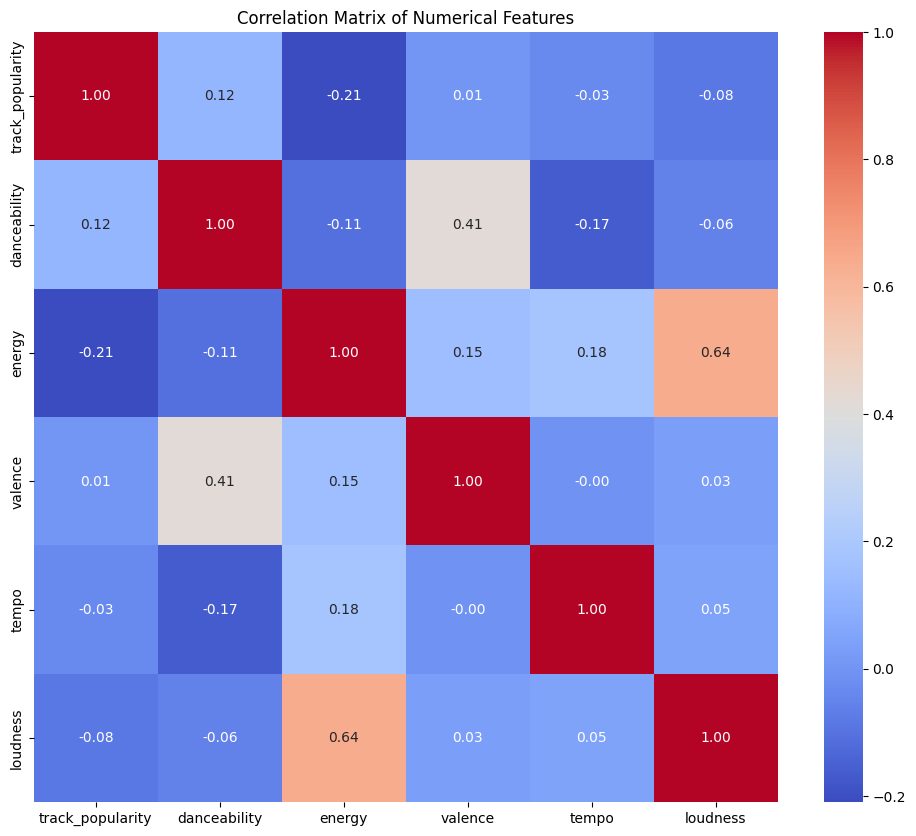

Strongest Positive Correlation: 0.12023898208638649
Strongest Negative Correlation: -0.2095011650735483


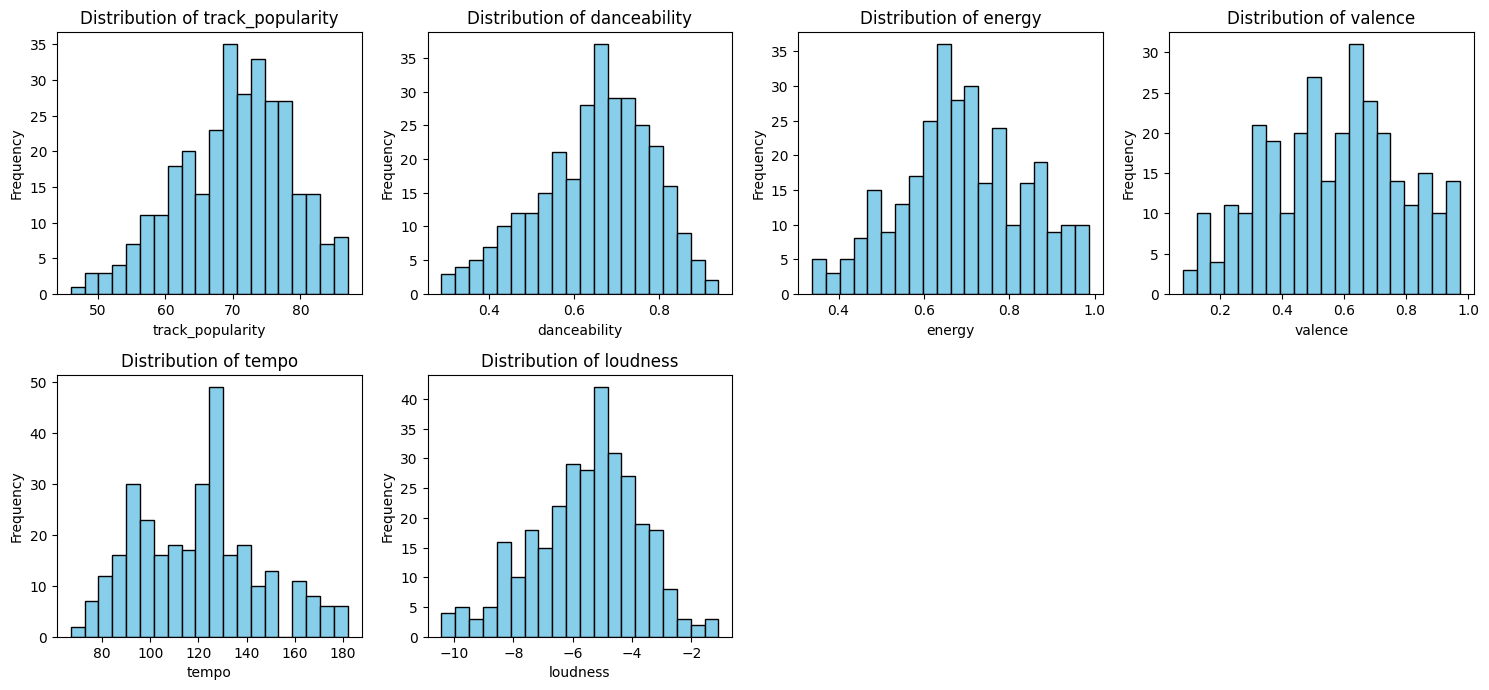

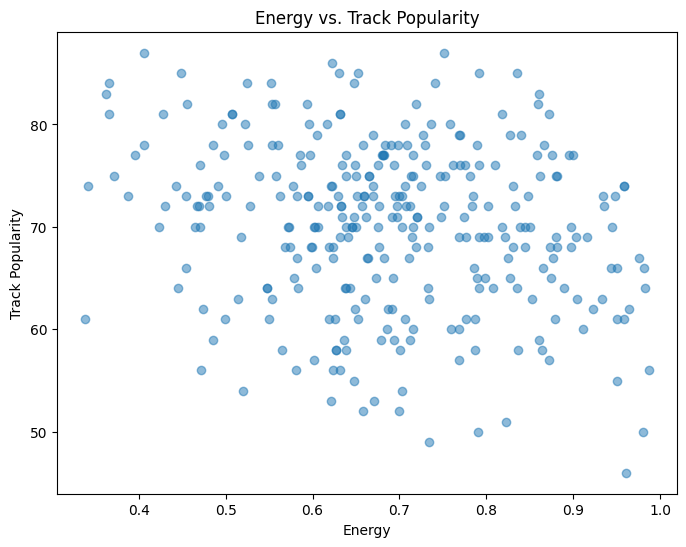

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#descriptive statistics grouped by genre
genre_stats = df.groupby('genres')[['track_popularity','danceability','energy','valence','tempo','loudness']].agg(['mean','median','std'])
display(genre_stats)

#correlationo matrix
numerical_features = ['track_popularity','danceability','energy','valence','tempo','loudness']
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#strongest correlation
strongest_positive_corr = correlation_matrix['track_popularity'].sort_values(ascending=False).iloc[1]
strongest_negative_corr = correlation_matrix['track_popularity'].sort_values().iloc[0]
print(f"Strongest Positive Correlation: {strongest_positive_corr}")
print(f"Strongest Negative Correlation: {strongest_negative_corr}")
# Distribution analysis
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 4, i + 1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Investigate potential interactions (example: energy vs. popularity)
plt.figure(figsize=(8, 6))
plt.scatter(df['energy'], df['track_popularity'], alpha=0.5)
plt.xlabel('Energy')
plt.ylabel('Track Popularity')
plt.title('Energy vs. Track Popularity')
plt.show()
